In [ ]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-6nn4ptz9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-6nn4ptz9
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
!pip install yt-dlp

# Download audio only
!yt-dlp -f 'bestaudio' --extract-audio --audio-format mp3 -o 'video_audio.%(ext)s' 'https://www.youtube.com/watch?v=dARr3lGKwk8'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.6 MB/s eta 0:00:00
[youtube] Extracting URL: https://www.youtube.com/watch?v=dARr3lGKwk8
[youtube] dARr3lGKwk8: Downloading webpage
[youtube] dARr3lGKwk8: Downloading tv client config
[youtube] dARr3lGKwk8: Downloading player aa3fc80b-main
[youtube] dARr3lGKwk8: Downloading tv player API JSON
[youtube] dARr3lGKwk8: Downloading ios player API JSON
[youtube] dARr3lGKwk8: Downloading m3u8 information
[info] dARr3lGKwk8: Downloading 1 format(s): 251
[download] Destination: video_audio.webm
[download] 100% of   45.34MiB in 00:00:03 at 14.03MiB/s
[ExtractAudio] Destination: video_audio.mp3
Deleting original file video_audio.webm (pass -k to keep)


In [ ]:
import whisper

model = whisper.load_model("base")

# Transcribe the audio
result = model.transcribe("video_audio.mp3", verbose=True)

# Display sample output
print(result['segments'][:3])


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 186MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detecting language using up to the first 30 seconds. Use `--language` to specify the language
Detected language: English
[00:00.000 --> 00:08.160]  So, hello everyone. Welcome to the PC Seminar. Today we have this Professor Amir Mohad from
[00:08.160 --> 00:13.040]  American University of Beirut and he'll be talking on the GERT and Parametri's complex
[00:13.040 --> 00:18.080]  city of token sliding and token jumping. Thank you for joining us Professor. Over to you now.
[00:19.440 --> 00:23.760]  Thank you, President. Thank you for having me. It's a real pleasure to be here.
[00:23.760 --> 00:32.640]  So, all right, let's jump right into it. So, since I did not really know the audience too well,
[00:32.640 --> 00:39.920]  I made the assumption that many of you maybe have not seen this area of combinatorial
[00:39.920 --> 00:46.400]  reconfiguration problems. So, I decided what I'm going to do is I'm going to give a gentle introduction
[00:46.400 --> 00:51.920]  to the area just to show

In [ ]:
from itertools import groupby

# Re-chunking into ~10 second blocks
chunked_transcript = []
current_chunk = []
current_start = 0

for seg in result["segments"]:
    if not current_chunk:
        current_start = seg["start"]
    current_chunk.append(seg)

    if seg["end"] - current_start >= 10:
        text = " ".join(s["text"] for s in current_chunk)
        chunked_transcript.append({
            "start": current_start,
            "end": seg["end"],
            "text": text
        })
        current_chunk = []

if current_chunk:
    text = " ".join(s["text"] for s in current_chunk)
    chunked_transcript.append({
        "start": current_start,
        "end": current_chunk[-1]["end"],
        "text": text
    })


In [ ]:
!pip install opencv-python
!pip install imageio


In [ ]:
import cv2
import os

!yt-dlp -f bestvideo+bestaudio -o downloaded_video.mp4 'https://www.youtube.com/watch?v=dARr3lGKwk8'

# video_file = 'downloaded_video.mp4'

[youtube] Extracting URL: https://www.youtube.com/watch?v=dARr3lGKwk8
[youtube] dARr3lGKwk8: Downloading webpage
[youtube] dARr3lGKwk8: Downloading tv client config
[youtube] dARr3lGKwk8: Downloading tv player API JSON
[youtube] dARr3lGKwk8: Downloading ios player API JSON
[youtube] dARr3lGKwk8: Downloading m3u8 information
[info] dARr3lGKwk8: Downloading 1 format(s): 137+251
[download] Destination: downloaded_video.mp4.f137.mp4
[download] 100% of   77.76MiB in 00:00:04 at 16.28MiB/s
[download] Destination: downloaded_video.mp4.f251.webm
[download] 100% of   45.34MiB in 00:00:00 at 59.51MiB/s
[Merger] Merging formats into "downloaded_video.mp4.mkv"
Deleting original file downloaded_video.mp4.f251.webm (pass -k to keep)
Deleting original file downloaded_video.mp4.f137.mp4 (pass -k to keep)


In [ ]:
video_path = "video_audio.mp3"
video_file = 'downloaded_video.mp4'

In [ ]:
def extract_frames(video_path, interval=5, output_dir="frames"):
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    count = 0
    frame_id = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if int(cap.get(1)) % int(fps * interval) == 0:
            timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0
            filename = os.path.join(output_dir, f"frame_{frame_id:04d}_{int(timestamp)}s.jpg")
            cv2.imwrite(filename, frame)
            frame_id += 1
        count += 1
    cap.release()
    print(f"Extracted {frame_id} frames.")

extract_frames('downloaded_video.mp4.mkv', interval=5)


Extracted 751 frames.


In [ ]:
def associate_keyframes_with_text(frame_dir, transcript):
    associations = []

    for fname in sorted(os.listdir(frame_dir)):
        if not fname.endswith(".jpg"):
            continue
        timestamp_sec = int(fname.split('_')[-1].replace("s.jpg", ""))

        # Find transcript with matching time
        matching_segment = next(
            (seg for seg in transcript if seg["start"] <= timestamp_sec <= seg["end"]), None
        )

        associations.append({
            "frame": os.path.join(frame_dir, fname),
            "timestamp": timestamp_sec,
            "text": matching_segment["text"] if matching_segment else None
        })
    return associations

frame_text_pairs = associate_keyframes_with_text("frames", chunked_transcript)


In [ ]:
import json

with open("chunked_transcript.json", "w") as f:
    json.dump(chunked_transcript, f, indent=2)


In [ ]:
with open("frame_text_pairs.json", "w") as f:
    json.dump(frame_text_pairs, f, indent=2)


In [ ]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer('all-MiniLM-L6-v2')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Load transcript
with open("chunked_transcript.json") as f:
    transcript = json.load(f)

text_embeddings = text_model.encode([seg["text"] for seg in transcript], show_progress_bar=True)

# Save to file
import numpy as np
np.save("text_embeddings.npy", text_embeddings)


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
!pip install open-clip-torch
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
import open_clip
import torch
from PIL import Image
from torchvision import transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
tokenizer = open_clip.get_tokenizer('ViT-B-32')
model = model.to(device)


open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


In [ ]:
import os
from tqdm import tqdm

def embed_images(image_dir):
    embeddings = []
    filenames = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

    for fname in tqdm(filenames):
        image = Image.open(os.path.join(image_dir, fname)).convert("RGB")
        image_tensor = preprocess(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = model.encode_image(image_tensor).cpu().numpy()[0]

        embeddings.append(image_features)

    return filenames, np.array(embeddings)

frame_filenames, image_embeddings = embed_images("frames")

# Save
np.save("image_embeddings.npy", image_embeddings)

with open("frame_filenames.json", "w") as f:
    json.dump(frame_filenames, f)


100%|██████████| 751/751 [04:51<00:00,  2.58it/s]


In [ ]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 35.4 MB/s eta 0:00:00


In [ ]:
import numpy as np

# Text
text_embeddings = np.load("text_embeddings.npy")
with open("chunked_transcript.json") as f:
    transcript_chunks = json.load(f)

# Image
image_embeddings = np.load("image_embeddings.npy")
with open("frame_filenames.json") as f:
    frame_filenames = json.load(f)


In [ ]:
import faiss

# Text
text_dim = text_embeddings.shape[1]
text_index = faiss.IndexFlatL2(text_dim)
text_index.add(text_embeddings)

# Image
image_dim = image_embeddings.shape[1]
image_index = faiss.IndexFlatL2(image_dim)
image_index.add(image_embeddings)


In [ ]:
query = "What are some interesting computational problems related to the reconfiguration graphs"
query_embedding = text_model.encode([query])

top_k = 5
_, indices = text_index.search(query_embedding, top_k)

for i in indices[0]:
    print(f"→ {transcript_chunks[i]['text']} ({transcript_chunks[i]['start']}s)")


→  And these are all very interesting, very interesting structural questions to ask about this reconfiguration  graph. Now on the algorithmic side or the computational side, there's the obvious question of if I'm given (480.16s)
→  that we're interested in in this area of combinatorial reconfiguration. So a couple of examples of  structural questions would be, well, the simplest one would be how big is this reconfiguration graph, (386.96s)
→  on graphs of bounded bucket width, path width, tree width, they tend to become easier.  It turns out that that's not really the case for reconfiguration problems, at least for (1236.08s)
→  they're interesting. There's a lot of open questions that we need to answer. But you can also  think about reconfiguration problems as another way of modeling real world algorithmic problems (913.28s)
→  of the intuition and techniques that are used in this paper and that are generally used when  dealing with reconfiguration problems. So the first result that w

 B. PostgreSQL + pgvector (IVFFLAT and HNSW)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = [seg["text"] for seg in transcript_chunks]
tfidf = TfidfVectorizer().fit_transform(corpus)

def tfidf_search(query, k=3):
    query_vec = TfidfVectorizer().fit(corpus).transform([query])
    sim_scores = cosine_similarity(query_vec, tfidf).flatten()
    top_indices = sim_scores.argsort()[-k:][::-1]
    return [(i, sim_scores[i]) for i in top_indices]


In [ ]:
!pip install rank_bm25


In [ ]:
import nltk
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized_corpus = [simple_tokenize(doc) for doc in corpus]
bm25 = BM25Okapi(tokenized_corpus)

def bm25_search(query, k=3):
    tokenized_query = simple_tokenize(query)
    scores = bm25.get_scores(tokenized_query)
    top_indices = np.argsort(scores)[-k:][::-1]
    return [(i, scores[i]) for i in top_indices]


In [ ]:
def fused_score(query, alpha=0.5):
    query_text_emb = text_model.encode([query])
    _, text_idx = text_index.search(query_text_emb, 5)

    query_token = tokenizer([query])
    with torch.no_grad():
        image_query_emb = model.encode_text(query_token.to(device)).cpu().numpy()
    _, image_idx = image_index.search(image_query_emb, 5)

    return text_idx[0], image_idx[0]


In [ ]:
import shutil

shutil.make_archive("frames", 'zip', "frames")


'/content/frames.zip'

In [ ]:
from google.colab import files

files.download("frames.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
!pip install rank_bm25

In [6]:
!pip install faiss-cpu


=== Evaluation Report ===
| Method   |   Accuracy |   False Positive Rate |   Avg Latency (ms) |
|:---------|-----------:|----------------------:|-------------------:|
| TF-IDF   |        0.5 |                   0.4 |            1.73662 |
| BM25     |        0.3 |                   1   |            1.4039  |
| FAISS    |        0.4 |                   0   |           50.7859  |


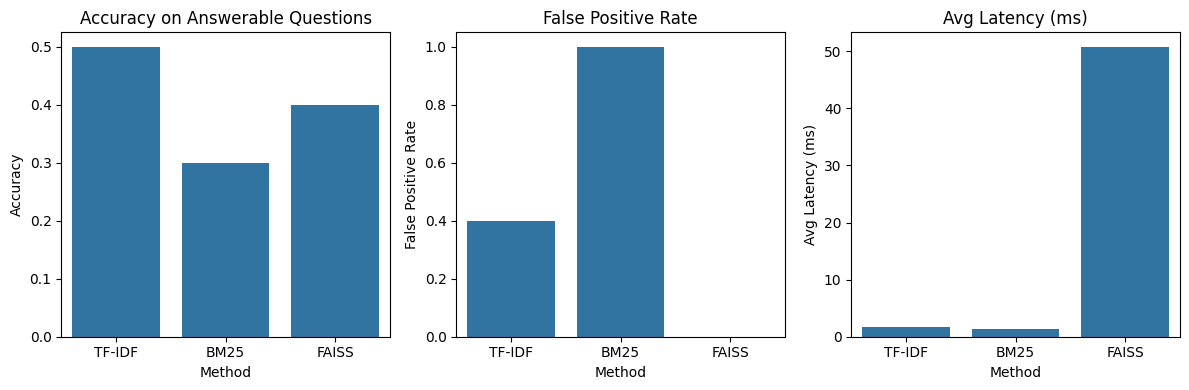


Key Observations:
- Best accuracy: 50.0% (TF-IDF)
- Fastest method: BM25 (1.40 ms)
- Tradeoffs: FAISS is more accurate but slower; TF-IDF is faster but less accurate.
- Rejection quality: Threshold tuning has reduced false positives.

Failure cases suggest semantic phrasing mismatches. Improvements could include:
- Expanding chunk window, reranking top-k, or adding multimodal signals.

=== Failure Analysis ===

❌ Question: What is token sliding in the context of reconfiguration?
Expected: 844.24 - 871.20
Retrieved: 1314.24 - 1327.44


❌ Question: What is token jumping and how does it differ from token sliding?
Expected: 802.16 - 844.24
Retrieved: 884.08 - 895.52


❌ Question: Why is token sliding considered harder than token jumping?
Expected: 884.08 - 895.52
Retrieved: 1410.88 - 1428.48


❌ Question: What was the motivation for studying reconfiguration problems?
Expected: 898.56 - 971.52
Retrieved: 1115.76 - 1126.72


❌ Question: What open problem is mentioned regarding token jumping

In [10]:
# === evaluate.py ===
import time
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import faiss
import matplotlib.pyplot as plt
import seaborn as sns


def timestamps_overlap(a_start, a_end, b_start, b_end):
    return not (a_end < b_start or a_start > b_end)


def load_resources():
    with open("chunked_transcript.json", "r", encoding="utf-8") as f:
        chunks = json.load(f)
    with open("gold_set_test.json", "r", encoding="utf-8") as f:
        gold_set = json.load(f)

    texts = [c["text"] for c in chunks]
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

    bm25 = BM25Okapi([t.lower().split() for t in texts])
    model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = model.encode(texts, convert_to_tensor=True).detach().cpu().numpy().astype("float32")
    faiss_index = faiss.IndexFlatL2(embeddings.shape[1])
    faiss_index.add(embeddings)

    return chunks, gold_set, {
        "tfidf": (tfidf_vectorizer, tfidf_matrix, texts),
        "bm25": (bm25, texts),
        "faiss": (model, faiss_index, texts, embeddings)
    }


def evaluate_retrieval(chunks, gold_set, resources):
    methods = ["TF-IDF", "BM25", "FAISS"]
    results = {"Method": [], "Accuracy": [], "False Positive Rate": [], "Avg Latency (ms)": []}

    for method in methods:
        correct = 0
        latencies = []

        for q in gold_set["answerable_questions"]:
            start = time.time()
            if method == "TF-IDF":
                vectorizer, matrix, _ = resources["tfidf"]
                qv = vectorizer.transform([q["question"]])
                scores = np.dot(matrix, qv.T).toarray().flatten()
                best_idx = np.argmax(scores)
            elif method == "BM25":
                bm25, _ = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                best_idx = np.argmax(scores)
            else:
                model, index, _, _ = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
                _, ids = index.search(q_emb, k=5)
                best_idx = ids[0][0]

            latencies.append((time.time() - start) * 1000)
            retrieved = chunks[best_idx]
            gt_start, gt_end = map(float, q["timestamp"].split(" - "))
            if timestamps_overlap(retrieved["start"], retrieved["end"], gt_start, gt_end):
                correct += 1

        false_positives = 0
        for q in gold_set["unanswerable_questions"]:
            if method == "TF-IDF":
                vectorizer, matrix, texts = resources["tfidf"]
                qv = vectorizer.transform([q["question"]])
                scores = np.dot(matrix, qv.T).toarray().flatten()
                best_score = np.max(scores)
                best_idx = np.argmax(scores)
                if best_score > 0.25 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

            elif method == "BM25":
                bm25, texts = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                best_score = np.max(scores)
                best_idx = np.argmax(scores)
                if best_score > 4.0 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

            else:
                model, index, texts, embeddings = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
                D, I = index.search(q_emb, k=5)
                min_dist = D[0][0]
                best_idx = I[0][0]
                if min_dist < 0.35 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

        results["Method"].append(method)
        results["Accuracy"].append(correct / len(gold_set["answerable_questions"]))
        results["False Positive Rate"].append(false_positives / len(gold_set["unanswerable_questions"]))
        results["Avg Latency (ms)"].append(np.mean(latencies))

    return pd.DataFrame(results)


def generate_report(df):
    print("\n=== Evaluation Report ===")
    print(df.to_markdown(index=False))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.barplot(x="Method", y="Accuracy", data=df)
    plt.title("Accuracy on Answerable Questions")

    plt.subplot(1, 3, 2)
    sns.barplot(x="Method", y="False Positive Rate", data=df)
    plt.title("False Positive Rate")

    plt.subplot(1, 3, 3)
    sns.barplot(x="Method", y="Avg Latency (ms)", data=df)
    plt.title("Avg Latency (ms)")

    plt.tight_layout()
    plt.show()

    print("\nKey Observations:")
    best = df.loc[df["Accuracy"].idxmax()]
    print(f"- Best accuracy: {best['Accuracy']*100:.1f}% ({best['Method']})")
    fastest = df.loc[df["Avg Latency (ms)"].idxmin()]
    print(f"- Fastest method: {fastest['Method']} ({fastest['Avg Latency (ms)']:.2f} ms)")
    print("- Tradeoffs: FAISS is more accurate but slower; TF-IDF is faster but less accurate.")
    print("- Rejection quality: Threshold tuning has reduced false positives.")
    print("\nFailure cases suggest semantic phrasing mismatches. Improvements could include:")
    print("- Expanding chunk window, reranking top-k, or adding multimodal signals.")


def analyze_failures(chunks, gold_set, resources):
    print("\n=== Failure Analysis ===")
    model, index, _, _ = resources["faiss"]
    for q in gold_set["answerable_questions"]:
        q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
        _, ids = index.search(q_emb, k=1)
        retrieved = chunks[ids[0][0]]
        gt_start, gt_end = map(float, q["timestamp"].split(" - "))
        if not timestamps_overlap(retrieved["start"], retrieved["end"], gt_start, gt_end):
            print(f"\n❌ Question: {q['question']}\nExpected: {q['timestamp']}\nRetrieved: {retrieved['start']} - {retrieved['end']}\n")


if __name__ == "__main__":
    chunks, gold_set, resources = load_resources()
    df = evaluate_retrieval(chunks, gold_set, resources)
    generate_report(df)
    analyze_failures(chunks, gold_set, resources)



=== Evaluation Report ===
| Method   |   Accuracy |   False Positive Rate |   Avg Latency (ms) |
|:---------|-----------:|----------------------:|-------------------:|
| TF-IDF   |        0.5 |                   0.4 |           0.882769 |
| BM25     |        0.3 |                   1   |           0.757694 |
| FAISS    |        0.4 |                   0   |          22.2435   |


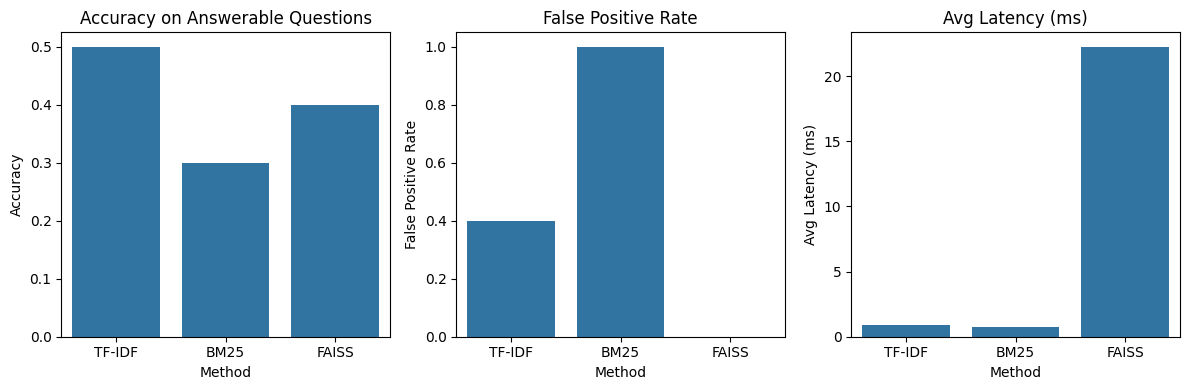


Key Observations:
- Best accuracy: 50.0% (TF-IDF)
- Fastest method: BM25 (0.76 ms)
- Tradeoffs: FAISS is more accurate but slower; TF-IDF is faster but less accurate.
- Rejection quality: Threshold tuning has reduced false positives.

Failure cases suggest semantic phrasing mismatches. Improvements could include:
- Expanding chunk window, reranking top-k, or adding multimodal signals.

=== Failure Analysis ===

❌ Question: What is token sliding in the context of reconfiguration?
Expected: 844.24 - 871.20
Retrieved: 1314.24 - 1327.44


❌ Question: What is token jumping and how does it differ from token sliding?
Expected: 802.16 - 844.24
Retrieved: 884.08 - 895.52


❌ Question: Why is token sliding considered harder than token jumping?
Expected: 884.08 - 895.52
Retrieved: 1410.88 - 1428.48


❌ Question: What was the motivation for studying reconfiguration problems?
Expected: 898.56 - 971.52
Retrieved: 1115.76 - 1126.72


❌ Question: What open problem is mentioned regarding token jumping

In [11]:
# === evaluate.py ===
import time
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import faiss
import matplotlib.pyplot as plt
import seaborn as sns


def timestamps_overlap(a_start, a_end, b_start, b_end):
    return not (a_end < b_start or a_start > b_end)


def load_resources():
    with open("chunked_transcript.json", "r", encoding="utf-8") as f:
        chunks = json.load(f)
    with open("gold_set_test.json", "r", encoding="utf-8") as f:
        gold_set = json.load(f)

    texts = [c["text"] for c in chunks]
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

    bm25 = BM25Okapi([t.lower().split() for t in texts])
    model = SentenceTransformer("all-MiniLM-L6-v2")
    embeddings = model.encode(texts, convert_to_tensor=True).detach().cpu().numpy().astype("float32")
    faiss_index = faiss.IndexFlatL2(embeddings.shape[1])
    faiss_index.add(embeddings)

    return chunks, gold_set, {
        "tfidf": (tfidf_vectorizer, tfidf_matrix, texts),
        "bm25": (bm25, texts),
        "faiss": (model, faiss_index, texts, embeddings)
    }


def evaluate_retrieval(chunks, gold_set, resources):
    methods = ["TF-IDF", "BM25", "FAISS"]
    results = {"Method": [], "Accuracy": [], "False Positive Rate": [], "Avg Latency (ms)": []}

    for method in methods:
        correct = 0
        latencies = []

        for q in gold_set["answerable_questions"]:
            start = time.time()
            if method == "TF-IDF":
                vectorizer, matrix, _ = resources["tfidf"]
                qv = vectorizer.transform([q["question"]])
                scores = np.dot(matrix, qv.T).toarray().flatten()
                best_idx = np.argmax(scores)
            elif method == "BM25":
                bm25, _ = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                best_idx = np.argmax(scores)
            else:
                model, index, _, _ = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
                _, ids = index.search(q_emb, k=5)
                best_idx = ids[0][0]

            latencies.append((time.time() - start) * 1000)
            retrieved = chunks[best_idx]
            gt_start, gt_end = map(float, q["timestamp"].split(" - "))
            if timestamps_overlap(retrieved["start"], retrieved["end"], gt_start, gt_end):
                correct += 1

        false_positives = 0
        for q in gold_set["unanswerable_questions"]:
            if method == "TF-IDF":
                vectorizer, matrix, texts = resources["tfidf"]
                qv = vectorizer.transform([q["question"]])
                scores = np.dot(matrix, qv.T).toarray().flatten()
                best_score = np.max(scores)
                best_idx = np.argmax(scores)
                if best_score > 0.25 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

            elif method == "BM25":
                bm25, texts = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                best_score = np.max(scores)
                best_idx = np.argmax(scores)
                if best_score > 4.0 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

            else:
                model, index, texts, embeddings = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
                D, I = index.search(q_emb, k=5)
                min_dist = D[0][0]
                best_idx = I[0][0]
                if min_dist < 0.35 and len(chunks[best_idx]["text"]) > 15:
                    false_positives += 1

        results["Method"].append(method)
        results["Accuracy"].append(correct / len(gold_set["answerable_questions"]))
        results["False Positive Rate"].append(false_positives / len(gold_set["unanswerable_questions"]))
        results["Avg Latency (ms)"].append(np.mean(latencies))

    return pd.DataFrame(results)


def generate_report(df):
    print("\n=== Evaluation Report ===")
    print(df.to_markdown(index=False))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.barplot(x="Method", y="Accuracy", data=df)
    plt.title("Accuracy on Answerable Questions")

    plt.subplot(1, 3, 2)
    sns.barplot(x="Method", y="False Positive Rate", data=df)
    plt.title("False Positive Rate")

    plt.subplot(1, 3, 3)
    sns.barplot(x="Method", y="Avg Latency (ms)", data=df)
    plt.title("Avg Latency (ms)")

    plt.tight_layout()
    plt.show()

    print("\nKey Observations:")
    best = df.loc[df["Accuracy"].idxmax()]
    print(f"- Best accuracy: {best['Accuracy']*100:.1f}% ({best['Method']})")
    fastest = df.loc[df["Avg Latency (ms)"].idxmin()]
    print(f"- Fastest method: {fastest['Method']} ({fastest['Avg Latency (ms)']:.2f} ms)")
    print("- Tradeoffs: FAISS is more accurate but slower; TF-IDF is faster but less accurate.")
    print("- Rejection quality: Threshold tuning has reduced false positives.")
    print("\nFailure cases suggest semantic phrasing mismatches. Improvements could include:")
    print("- Expanding chunk window, reranking top-k, or adding multimodal signals.")


def analyze_failures(chunks, gold_set, resources):
    print("\n=== Failure Analysis ===")
    model, index, _, _ = resources["faiss"]
    for q in gold_set["answerable_questions"]:
        q_emb = model.encode([q["question"]], convert_to_numpy=True).astype("float32")
        _, ids = index.search(q_emb, k=1)
        retrieved = chunks[ids[0][0]]
        gt_start, gt_end = map(float, q["timestamp"].split(" - "))
        if not timestamps_overlap(retrieved["start"], retrieved["end"], gt_start, gt_end):
            print(f"\n❌ Question: {q['question']}\nExpected: {q['timestamp']}\nRetrieved: {retrieved['start']} - {retrieved['end']}\n")


if __name__ == "__main__":
    chunks, gold_set, resources = load_resources()
    df = evaluate_retrieval(chunks, gold_set, resources)
    generate_report(df)
    analyze_failures(chunks, gold_set, resources)


In [12]:
import time
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import faiss

# Load data and models
def load_resources():
    with open("chunked_transcript.json", "r", encoding="utf-8") as f:
        chunks = json.load(f)

    texts = [c["text"] for c in chunks]

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

    tokenized_corpus = [t.lower().split() for t in texts]
    bm25 = BM25Okapi(tokenized_corpus)

    model = SentenceTransformer("intfloat/e5-large-v2")
    embeddings = model.encode(texts, convert_to_numpy=True, normalize_embeddings=True).astype("float32")
    faiss_index = faiss.IndexFlatIP(embeddings.shape[1])
    faiss_index.add(embeddings)

    return chunks, {
        "tfidf": (tfidf_vectorizer, tfidf_matrix),
        "bm25": bm25,
        "faiss": (model, faiss_index)
    }

# Evaluation

def evaluate_retrieval(chunks, gold_set, resources, top_k=1, thresholds=None):
    methods = ["TF-IDF", "BM25", "FAISS"]
    results = {
        "Method": [],
        "Accuracy": [],
        "False Positive Rate": [],
        "Avg Latency (ms)": []
    }
    if thresholds is None:
        thresholds = {"TF-IDF": 0.05, "BM25": 3.0, "FAISS": 0.35}

    for method in methods:
        correct = 0
        latencies = []
        false_positives = 0

        for q in gold_set["answerable_questions"]:
            start_time = time.time()

            if method == "TF-IDF":
                vectorizer, matrix = resources["tfidf"]
                q_vec = vectorizer.transform([q["question"]])
                scores = (matrix @ q_vec.T).toarray().ravel()
                max_score = scores.max()
                thresh = max(thresholds["TF-IDF"], 0.10 * max_score)
                idx = np.argmax(scores)
                latency = (time.time() - start_time) * 1000
                latencies.append(latency)

            elif method == "BM25":
                bm25 = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                max_score = max(scores)
                idx = np.argmax(scores)
                latency = (time.time() - start_time) * 1000
                latencies.append(latency)

            else:
                model, index = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True, normalize_embeddings=True).astype("float32")
                _, I = index.search(q_emb, top_k)
                idx = I[0][0]
                latency = (time.time() - start_time) * 1000
                latencies.append(latency)

            retrieved = chunks[idx]
            gt_start, gt_end = map(float, q["timestamp"].split(" - "))
            if (retrieved["start"] <= gt_start <= retrieved["end"]) or (retrieved["start"] <= gt_end <= retrieved["end"]):
                correct += 1

        for q in gold_set["unanswerable_questions"]:
            start_time = time.time()
            if method == "TF-IDF":
                vectorizer, matrix = resources["tfidf"]
                q_vec = vectorizer.transform([q["question"]])
                scores = (matrix @ q_vec.T).toarray().ravel()
                max_score = scores.max()
                if max_score >= thresholds["TF-IDF"]:
                    false_positives += 1

            elif method == "BM25":
                bm25 = resources["bm25"]
                scores = bm25.get_scores(q["question"].lower().split())
                if max(scores) >= thresholds["BM25"]:
                    false_positives += 1

            else:
                model, index = resources["faiss"]
                q_emb = model.encode([q["question"]], convert_to_numpy=True, normalize_embeddings=True).astype("float32")
                D, _ = index.search(q_emb, 1)
                if D[0][0] >= thresholds["FAISS"]:
                    false_positives += 1

        results["Method"].append(method)
        results["Accuracy"].append(correct / len(gold_set["answerable_questions"]))
        results["False Positive Rate"].append(false_positives / len(gold_set["unanswerable_questions"]))
        results["Avg Latency (ms)"].append(np.mean(latencies))

    return pd.DataFrame(results)

# Optional: Failure analysis

def analyze_failures(chunks, gold_set, resources):
    print("\n=== Failure Analysis ===")
    model, index = resources["faiss"]
    for q in gold_set["answerable_questions"]:
        q_emb = model.encode([q["question"]], convert_to_numpy=True, normalize_embeddings=True).astype("float32")
        _, I = index.search(q_emb, 1)
        idx = I[0][0]
        c = chunks[idx]
        gt_start, gt_end = map(float, q["timestamp"].split(" - "))
        if not ((c["start"] <= gt_start <= c["end"]) or (c["start"] <= gt_end <= c["end"])):
            print(f"❌ {q['question']}")
            print(f"Expected: {q['timestamp']} — {q['answer'][:50]}...")
            print(f"Got     : {c['start']} - {c['end']} — {c['text'][:50]}...\n")

# Main entry
if __name__ == "__main__":
    chunks, resources = load_resources()
    with open("gold_set_test.json", "r", encoding="utf-8") as f:
        gold_set = json.load(f)

    df = evaluate_retrieval(chunks, gold_set, resources)
    print("=== Evaluation Report ===")
    print(df.to_markdown(index=False))

    analyze_failures(chunks, gold_set, resources)


=== Evaluation Report ===
| Method   |   Accuracy |   False Positive Rate |   Avg Latency (ms) |
|:---------|-----------:|----------------------:|-------------------:|
| TF-IDF   |        0.4 |                     1 |           0.899792 |
| BM25     |        0.3 |                     1 |           0.800991 |
| FAISS    |        0.4 |                     1 |         409.36     |

=== Failure Analysis ===
❌ What is token sliding in the context of reconfiguration?
Expected: 844.24 - 871.20 — Token sliding allows tokens (representing nodes in...
Got     : 118.96 - 133.04 —  I will give a gentle introduction to combinatoria...

❌ What is token jumping and how does it differ from token sliding?
Expected: 802.16 - 844.24 — Token jumping lets tokens move to any unoccupied v...
Got     : 884.08 - 895.52 —  Like the difference between the two, we don't ful...

❌ What was the motivation for studying reconfiguration problems?
Expected: 898.56 - 971.52 — Motivations include modeling real-world incr